# 1. Dealing with Dependencies

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

/Users/gauravsharma/miniforge3/envs/cv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Training custom model

In [4]:
import uuid   # Unique identifier
import os
import time

In [9]:
os.getcwd()

'/Users/gauravsharma/Documents/DIT/Python/Projects/YOLO/YOLO-v5'

In [1]:
#Model Training:-

!cd yolov5-master && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yaml --weights yolov5s.pt
# !cd yolov5-master && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt --workers 2   #if above is not running due to excessive GPU load

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-8-20 Python-3.8.6 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

# 3. Load Custom Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/gauravsharma/Documents/DIT/Python/Projects/YOLO/YOLO-v5/yolov5-master/runs/train/exp2/weights/best.pt', force_reload=True)
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/gauravsharma/Documents/DIT/Python/Projects/YOLO/YOLO-v5/yolov5-master/runs/train/exp7/weights/last.pt')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/gauravsharma/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-21 Python-3.8.6 torch-1.12.1 CPU

Fusing layers... 
Model summary: 213 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# 4.1 Prediction from custom model for image

In [5]:
# img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')
img='/Users/gauravsharma/Documents/DIT/Python/Projects/YOLO/YOLO-v5/dataset_waste/batteries/ battery6.jpg'  #loading image
results = model(img)  #prediction

In [7]:
results.print() #checking prediction result

image 1/1: 800x800 1 metal
Speed: 17.2ms pre-process, 122.8ms inference, 4.2ms NMS per image at shape (1, 3, 640, 640)


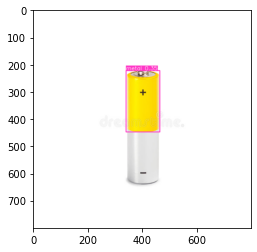

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4.2 Precition from Video (webcam or video)

In [11]:
#Starting video  [ "video1.mov"--> for video , 0 --> for webcam ,1--> for outside webcam ]
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

: 

In [3]:
# #Starting video  [ "video1.mov"--> for video , 0 --> for webcam ,1--> for outside webcam ]
# cap = cv2.VideoCapture(0) 

# #Setting for saving captured video
# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))
# size = (frame_width, frame_height)
# result = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'MJPG'),10, size)  # for saving video

# while cap.isOpened():
#     ret, frame = cap.read()
#     if ret:
#         results = model(frame)  #prediction
#         results=np.squeeze(results.render()) #reducing shape of np array for visualization
#         cv2.imshow("YOLO", results) 
#         result.write(frame)
#         key = cv2.waitKey(1)
#         if key == ord('q'):
#             break
#     else:
#         break

# result.release()
# cap.release()
# cv2.destroyAllWindows()

: 